In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_project/train-perceptron.txt')

In [ ]:
dataset

,1 1 1
0,1 -1 1
1,2 2.5 2
2,0 2 2
3,2 3 2
4,4 5 1


<ipython-input-60-c918b10f56d1>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,idx+1)


[]

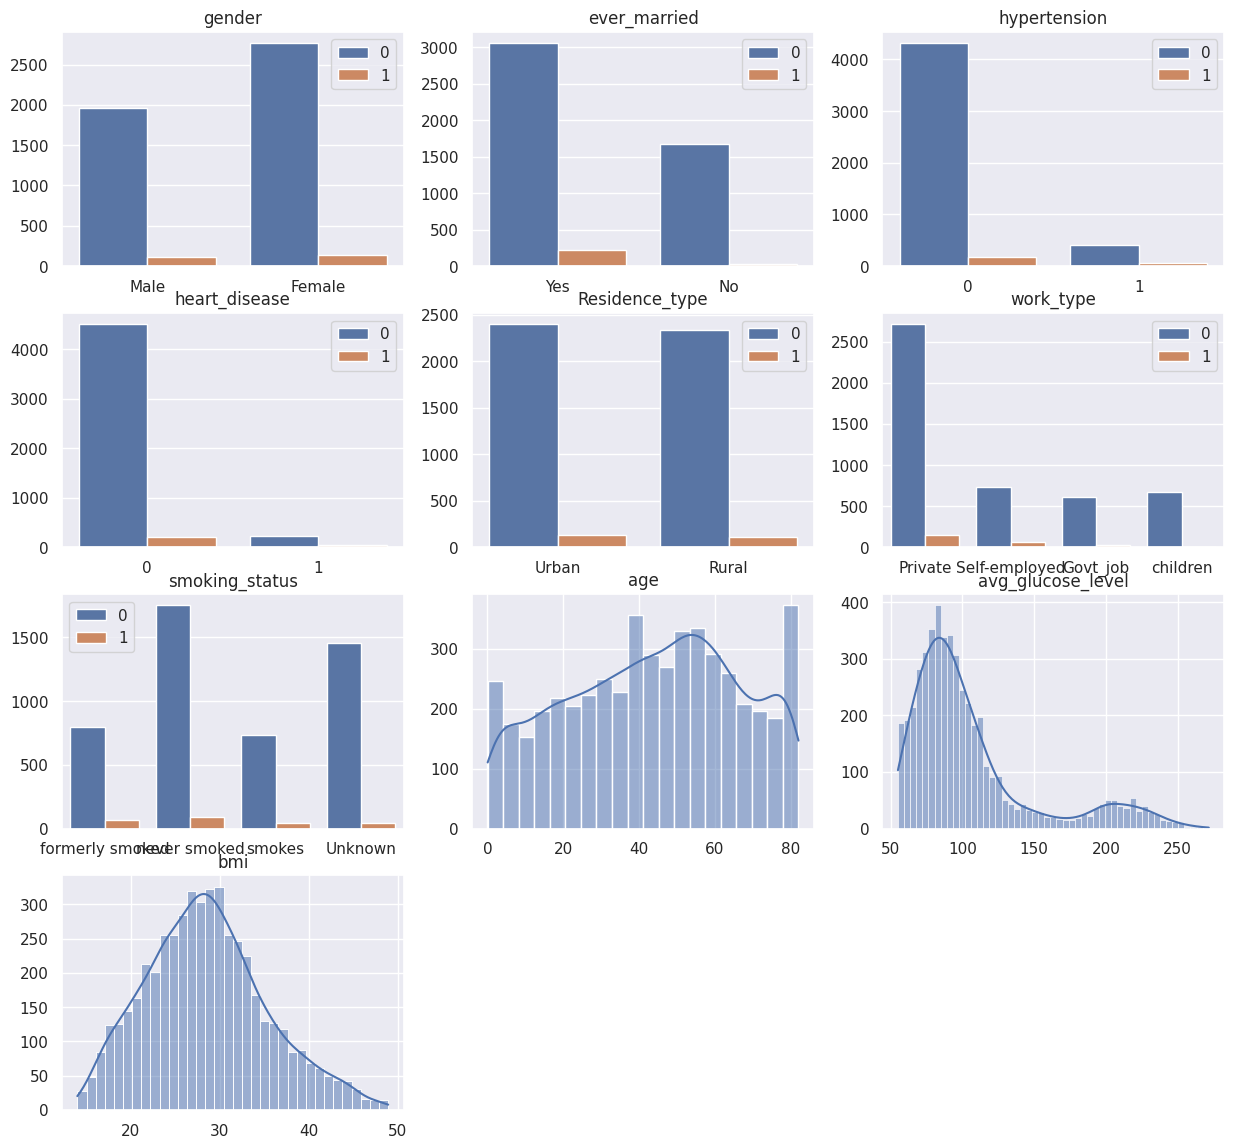

In [ ]:
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']
num_cols = ['age', 'avg_glucose_level', 'bmi']
fig,ax = plt.subplots(figsize = (15, 14))
idx = 0
for i in object_cols:
    plt.subplot(4,3,idx+1)
    sns.countplot(x = i, data = dataset, hue = dataset['stroke'])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(i)
    plt.legend()
    idx += 1

for i in num_cols:
    plt.subplot(4,3,idx+1)
    sns.histplot(x = dataset[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx += 1

plt.plot()

In [ ]:
dataset['bmi'].fillna(float(dataset['bmi'].mean()), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols:
  dataset[i] = le.fit_transform(dataset[i])

dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [ ]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [ ]:
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x = dataset.drop(columns=['stroke'])
y = dataset['stroke']
s1=SMOTE()

x_data,y_data=s1.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 50)

print(x_train.shape, x_test.shape)

(7572, 10) (1894, 10)


Accuracy score:  0.8136219640971489
F1 score:  0.8175710594315245
Precision score:  0.8006072874493927
Recall score:  0.8352692713833157


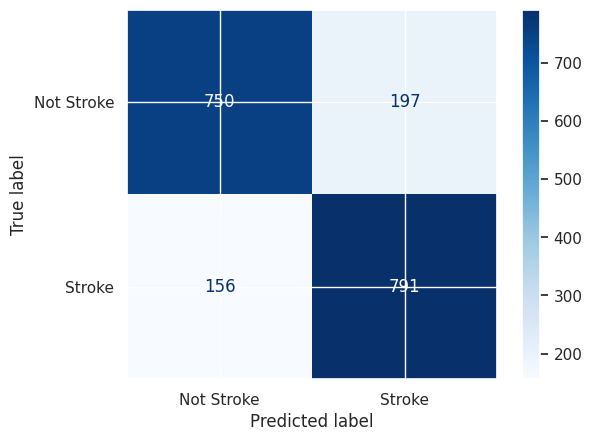

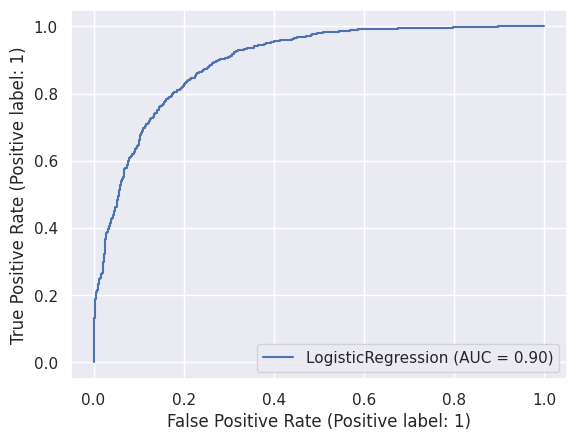

In [ ]:
clf = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=0).fit(x_train, y_train)
Y_pred = clf.predict(x_test)


cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])

cmd.plot(cmap=plt.cm.Blues)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)

Accuracy score:  0.7914466737064414
F1 score:  0.8083454633672973
Precision score:  0.7477558348294434
Recall score:  0.8796198521647307


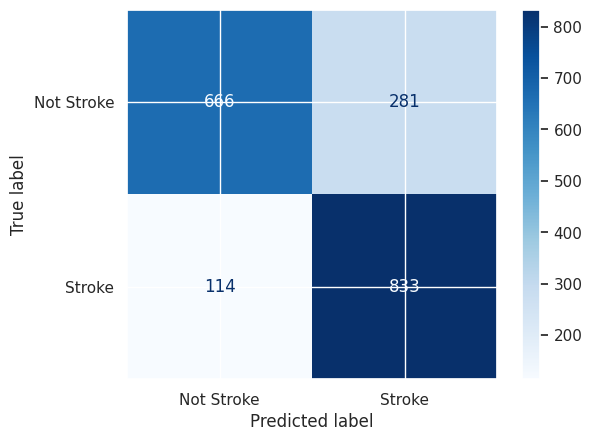

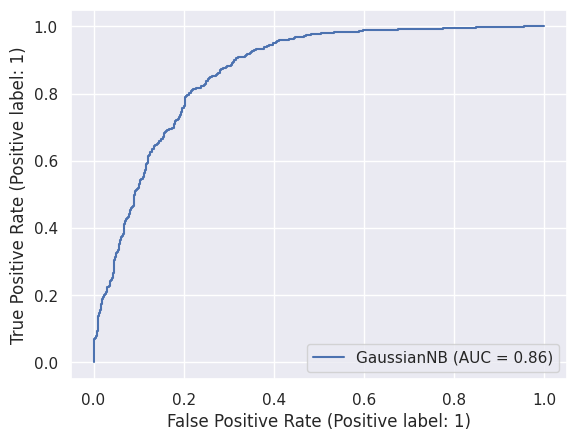

In [ ]:
gnb = GaussianNB(var_smoothing=1e-5)
gnb.fit(x_train, y_train)
Y_pred = gnb.predict(x_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])

cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, x_test, y_test)

Accuracy score:  0.909714889123548
F1 score:  0.9163814180929095
Precision score:  0.8533697632058288
Recall score:  0.989440337909187


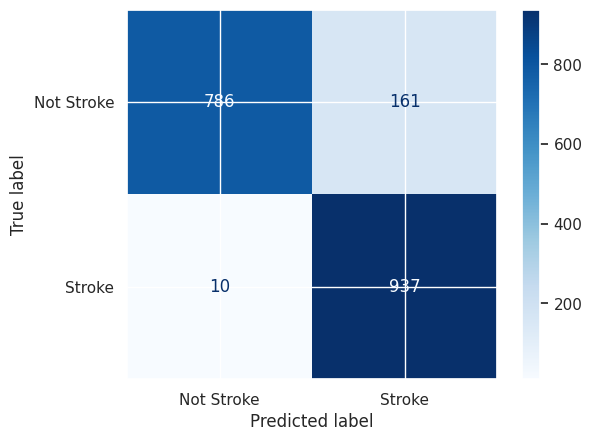

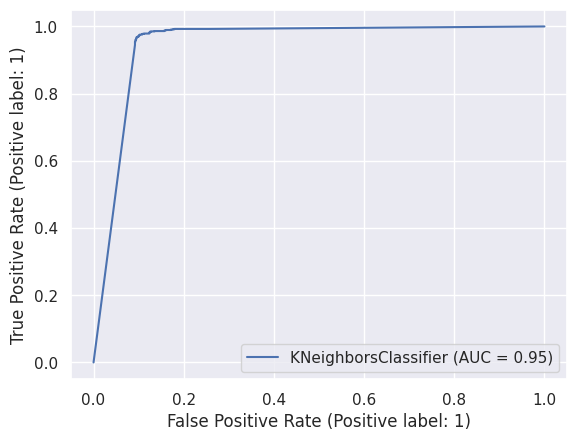

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
neigh.fit(x_train, y_train)
Y_pred = neigh.predict(x_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])

cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, x_test, y_test)

Accuracy score:  0.9503695881731784
F1 score:  0.9511434511434512
Precision score:  0.9365404298874105
Recall score:  0.9662090813093981


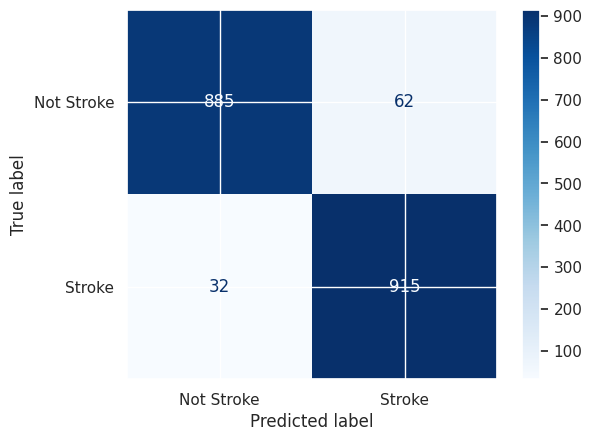

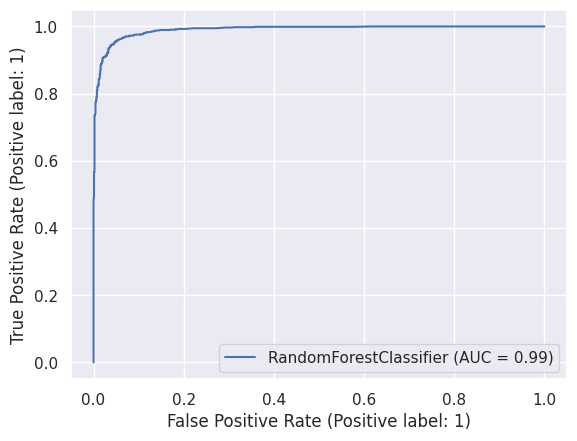

In [ ]:
rf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
Y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])

cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test)

Accuracy score:  0.9107708553326294
F1 score:  0.9127516778523489
Precision score:  0.8929292929292929
Recall score:  0.9334741288278775


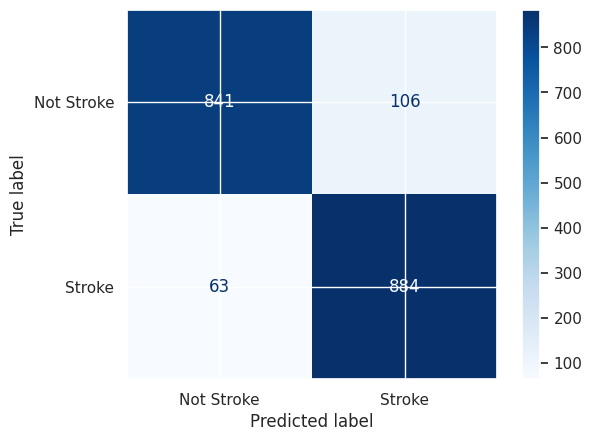

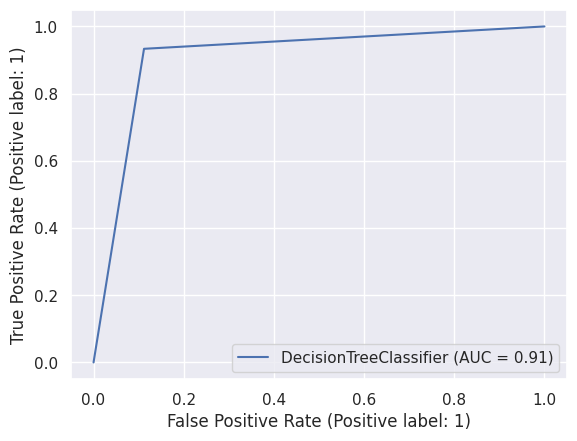

In [ ]:
dt = DecisionTreeClassifier(max_depth=25, random_state=6)
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])

cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)

Accuracy score:  0.9171066525871172
F1 score:  0.9189468249870935
Precision score:  0.898989898989899
Recall score:  0.9398099260823654


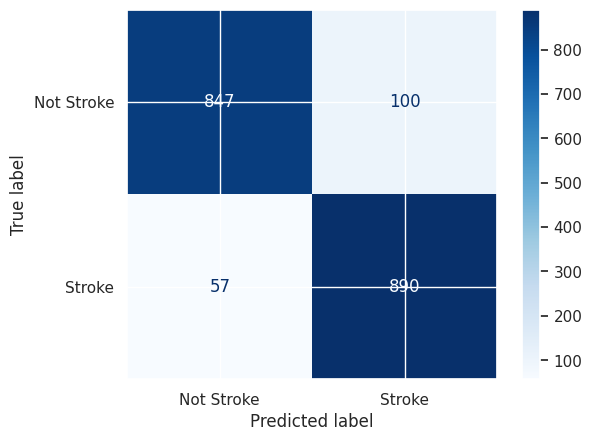

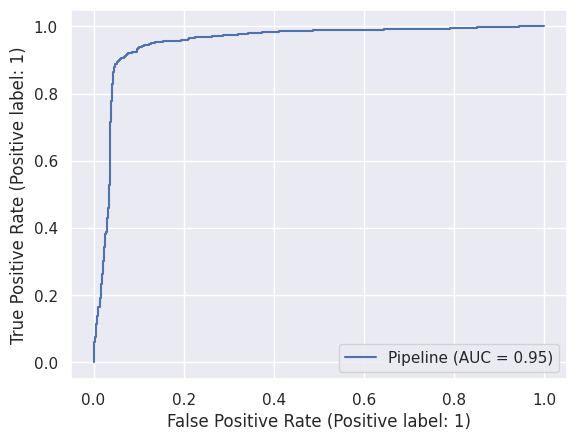

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma=1.0, C=10)).fit(x_train, y_train)
Y_pred= clf.predict(x_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Stroke','Stroke'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)